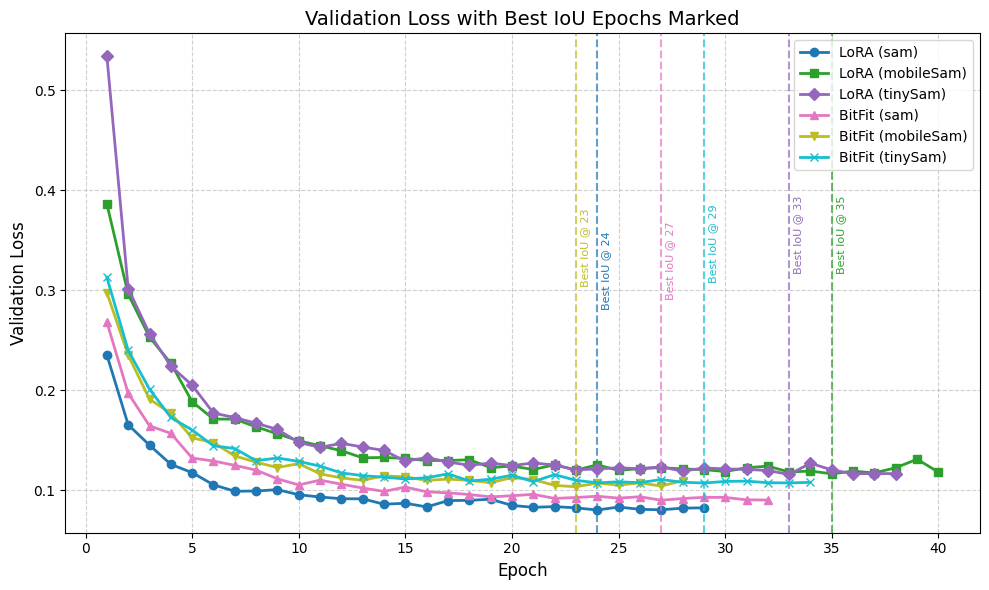

In [ ]:
# %%
import matplotlib.pyplot as plt
import numpy as np

# Validation losses per epoch
validation_losses = {
    "LoRA (sam)": [
        0.2353, 0.1654, 0.1450, 0.1258, 0.1175,
        0.1053, 0.0989, 0.0991, 0.1005, 0.0954,
        0.0931, 0.0914, 0.0913, 0.0859, 0.0869,
        0.0832, 0.0895, 0.0898, 0.0909, 0.0847,
        0.0828, 0.0835, 0.0823, 0.0801, 0.0831,
        0.0808, 0.0803, 0.0820, 0.0823
    ],
    "LoRA (mobileSam)": [
        0.3863, 0.2960, 0.2530, 0.2269, 0.1884,
        0.1711, 0.1710, 0.1633, 0.1563, 0.1493,
        0.1444, 0.1394, 0.1323, 0.1327, 0.1317,
        0.1296, 0.1296, 0.1304, 0.1225, 0.1241,
        0.1206, 0.1254, 0.1200, 0.1253, 0.1197,
        0.1216, 0.1225, 0.1212, 0.1205, 0.1186,
        0.1224, 0.1240, 0.1181, 0.1191, 0.1163,
        0.1190, 0.1172, 0.1224, 0.1309, 0.1180
    ],
    "LoRA (tinySam)": [
        0.5342, 0.3016, 0.2565, 0.2241, 0.2049,
        0.1771, 0.1726, 0.1669, 0.1607, 0.1477,
        0.1428, 0.1468, 0.1431, 0.1397, 0.1289,
        0.1326, 0.1281, 0.1249, 0.1270, 0.1246,
        0.1271, 0.1252, 0.1202, 0.1213, 0.1223,
        0.1214, 0.1233, 0.1189, 0.1222, 0.1212,
        0.1208, 0.1196, 0.1157, 0.1269, 0.1202,
        0.1164, 0.1166, 0.1165
    ],
    "BitFit (sam)": [
        0.2681, 0.1969, 0.1643, 0.1568, 0.1321,
        0.1291, 0.1248, 0.1200, 0.1113, 0.1052,
        0.1100, 0.1059, 0.1021, 0.0987, 0.1031,
        0.0983, 0.0973, 0.0956, 0.0932, 0.0944,
        0.0958, 0.0917, 0.0926, 0.0939, 0.0920,
        0.0934, 0.0899, 0.0916, 0.0928, 0.0927,
        0.0903, 0.0901
    ],
    "BitFit (mobileSam)": [
        0.2976, 0.2350, 0.1910, 0.1767, 0.1523,
        0.1475, 0.1342, 0.1279, 0.1226, 0.1265,
        0.1163, 0.1122, 0.1098, 0.1143, 0.1133,
        0.1097, 0.1111, 0.1097, 0.1075, 0.1125,
        0.1106, 0.1047, 0.1034, 0.1070, 0.1051,
        0.1072, 0.1041, 0.1094
    ],
    "BitFit (tinySam)":[
        0.3128, 0.2398, 0.2010, 0.1727, 0.1601,
        0.1443, 0.1416, 0.1294, 0.1321, 0.1287,
        0.1240, 0.1172, 0.1145, 0.1129, 0.1112,
        0.1123, 0.1163, 0.1091, 0.1109, 0.1149,
        0.1085, 0.1155, 0.1098, 0.1073, 0.1083,
        0.1075, 0.1106, 0.1079, 0.1071, 0.1087,
        0.1090, 0.1074, 0.1072, 0.1078
    ]
}

# Epoch where each model achieved its highest IoU (from validation)
best_iou_epochs = {
    "LoRA (sam)": 24,
    "LoRA (mobileSam)": 35,
    "LoRA (tinySam)": 33,
    "BitFit (sam)": 27,
    "BitFit (mobileSam)": 23,
    "BitFit (tinySam)": 29
}

# %%
# Marker and color setup
colors = plt.cm.tab10(np.linspace(0, 1, len(validation_losses)))
markers = ['o', 's', 'D', '^', 'v', 'x']

plt.figure(figsize=(10, 6))

for (label, losses), marker, color in zip(validation_losses.items(), markers, colors):
    epochs = np.arange(1, len(losses) + 1)
    plt.plot(epochs, losses, marker=marker, linewidth=2, label=label, color=color)

    # Add vertical line for best IoU epoch
    best_epoch = best_iou_epochs.get(label)
    if best_epoch is not None:
        plt.axvline(x=best_epoch, color=color, linestyle='--', alpha=0.7)
        plt.text(best_epoch + 0.2, min(losses) + 0.2, f"Best IoU @ {best_epoch}",
                 rotation=90, color=color, fontsize=8, va='bottom', ha='left')

plt.title("Validation Loss with Best IoU Epochs Marked", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Loss", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# plt.savefig("validation_loss_with_best_iou.png", dpi=300)
plt.show()
